
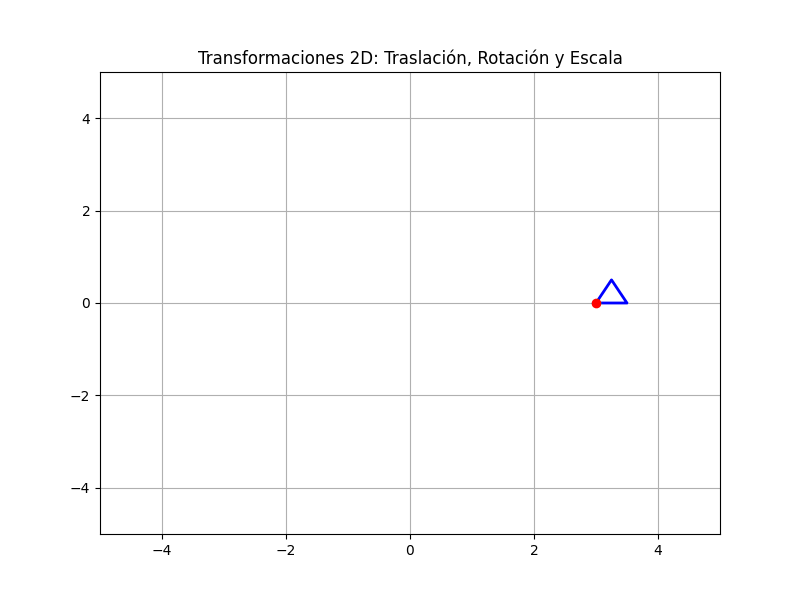

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import base64
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Configuración inicial
plt.style.use('default')

# Definimos un triángulo (3 vértices en 2D)
triangle = np.array([
    [0, 0],    # vértice 1
    [1, 0],    # vértice 2
    [0.5, 1],  # vértice 3
    [0, 0]     # cerramos el triángulo (para dibujo)
])

def translate(points, tx, ty):
    """Traslación 2D"""
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    # Convertimos a coordenadas homogéneas
    homog_points = np.column_stack([points, np.ones(len(points))])
    # Aplicamos transformación
    transformed = np.dot(homog_points, translation_matrix.T)
    return transformed[:, :2]

def rotate(points, angle):
    """Rotación 2D (ángulo en radianes)"""
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])
    homog_points = np.column_stack([points, np.ones(len(points))])
    transformed = np.dot(homog_points, rotation_matrix.T)
    return transformed[:, :2]

def scale(points, sx, sy):
    """Escala 2D"""
    scale_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    homog_points = np.column_stack([points, np.ones(len(points))])
    transformed = np.dot(homog_points, scale_matrix.T)
    return transformed[:, :2]

# Configuración de la figura
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid(True)
ax.set_title('Transformaciones 2D: Traslación, Rotación y Escala')

# Inicializamos el objeto de línea
line, = ax.plot([], [], 'b-', lw=2)
point, = ax.plot([], [], 'ro')

# Función de inicialización
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Función de animación
def animate(i):
    t = i / 30  # Normalizamos el tiempo

    # Aplicamos transformaciones secuenciales
    transformed = triangle.copy()

    # Escala pulsante
    scale_factor = 0.5 + 0.5 * np.sin(t * 2)
    transformed = scale(transformed, scale_factor, scale_factor)

    # Rotación continua
    angle = t * 2  # 2 radianes por unidad de tiempo
    transformed = rotate(transformed, angle)

    # Traslación elíptica
    tx = 3 * np.cos(t)
    ty = 2 * np.sin(t)
    transformed = translate(transformed, tx, ty)

    # Aseguramos que los datos sean secuencias numpy
    x_data = np.asarray(transformed[:, 0])
    y_data = np.asarray(transformed[:, 1])

    # Actualizamos los datos del gráfico
    line.set_data(x_data, y_data)

    # Marcamos el primer punto para referencia
    point.set_data([x_data[0]], [y_data[0]])

    return line, point

# Creamos la animación
frames = 120  # Número de frames
anim = FuncAnimation(fig, animate, frames=frames,
                    init_func=init, blit=True, interval=50)

# Mostramos en el notebook
plt.close()  # Evitamos que se muestre la figura estática
HTML(anim.to_jshtml())

# Guardamos la animación como GIF
gif_path = 'transformaciones_2d.gif'
anim.save(gif_path, writer='pillow', fps=30)

# Mostramos el GIF guardado
with open(gif_path, 'rb') as f:
    display(HTML(f'<img src="data:image/gif;base64,{base64.b64encode(f.read()).decode()}" />'))